<a href="https://colab.research.google.com/github/aalr007/NavegacionAutonoma/blob/main/4_2_Detecci%C3%B3n_de_Se%C3%B1ales_de_Tr%C3%A1nsito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> ***Navegación Autónoma*** </center>
## <center> ***Actividad 4.2 - Detección de Señales de Tránsito*** </center>

### Profesor: Dr. David Antonio Torres
### Alumnos: 
* Andrei García Torres               A01793891
* Aurelio Antonio Lozano Rábago      A01081266
* Jorge Luis Tapia Peñaloza          A01793013
* Luis Alfredo Negron Naldos         A01793865

#### <p style='text-align: right;'> 11 de Junio del 2023 </p>

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random
     
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
     
from keras.models import Model

import matplotlib.image as mpimg
import seaborn as sns
import cv2

from google.colab import drive
import glob

#Se carga el dataset y se verifica el número de muestras en cada set

In [25]:
drive.mount('/content/drive',force_remount=True)
file_path = '/content/drive/MyDrive/MNA/NavAutonoma/GTRS/*'


Mounted at /content/drive


In [26]:
ID0 = glob.glob('/content/drive/MyDrive/MNA/NavAutonoma/GTRS/0/*')
ID1 = glob.glob('/content/drive/MyDrive/MNA/NavAutonoma/GTRS/1/*')

In [41]:
print(ID0)

['/content/drive/MyDrive/MNA/NavAutonoma/GTRS/0/00000_00000_00026.png', '/content/drive/MyDrive/MNA/NavAutonoma/GTRS/0/00000_00001_00009.png', '/content/drive/MyDrive/MNA/NavAutonoma/GTRS/0/00000_00001_00005.png', '/content/drive/MyDrive/MNA/NavAutonoma/GTRS/0/00000_00000_00029.png', '/content/drive/MyDrive/MNA/NavAutonoma/GTRS/0/00000_00002_00000.png', '/content/drive/MyDrive/MNA/NavAutonoma/GTRS/0/00000_00000_00003.png', '/content/drive/MyDrive/MNA/NavAutonoma/GTRS/0/00000_00000_00025.png', '/content/drive/MyDrive/MNA/NavAutonoma/GTRS/0/00000_00001_00013.png', '/content/drive/MyDrive/MNA/NavAutonoma/GTRS/0/00000_00001_00016.png', '/content/drive/MyDrive/MNA/NavAutonoma/GTRS/0/00000_00001_00029.png', '/content/drive/MyDrive/MNA/NavAutonoma/GTRS/0/00000_00001_00006.png', '/content/drive/MyDrive/MNA/NavAutonoma/GTRS/0/00000_00000_00007.png', '/content/drive/MyDrive/MNA/NavAutonoma/GTRS/0/00000_00001_00018.png', '/content/drive/MyDrive/MNA/NavAutonoma/GTRS/0/00000_00001_00024.png', '/con

Cambiamos el tamaño de las imagenes para que todas sean del mismo tamaño.

In [48]:
size = (25, 25)
IList = [ID0, ID1]
X = []

for sublist in IList:
    images = [cv2.resize(plt.imread(img_path), size) for img_path in sublist]
    X.extend(images)

X = np.array(X)

Convertir la lista de listas en un arreglo unidimensional

In [49]:
print(X.shape)

(2430, 25, 25, 3)


Imprimimos una imagen para checar

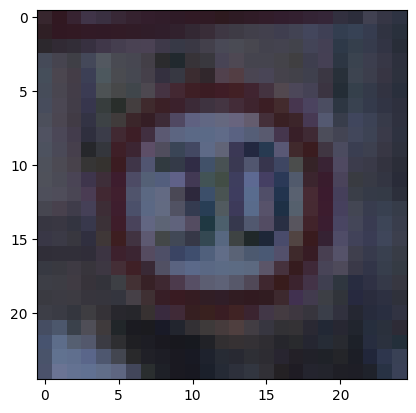

In [31]:
imagen_redimensionada = IList[1][13]
plt.imshow(imagen_redimensionada)
plt.show()

Creamos las etiquetas de la salida

In [32]:
Y0 = [0] * len(ID0)
Y1 = [1] * len(ID1)

Hacemos one hot encoding para cada salida

In [53]:
Y = to_categorical (Y0+Y1,2)
Y = np.array(Y)

In [54]:
print(Y.shape)

(2430, 2)


Se Define el modelo

In [35]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3, 3), input_shape = X.shape[1:], activation='relu', padding='same'))
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
#model.add(AveragePooling2D())

model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation='relu', padding='same'))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation='relu', padding='same'))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(units = 512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 10, activation='softmax'))

model.compile(Adam(lr = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

ValueError: ignored